# Importing Useful Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
#import statsmodels as sm
from pandas_datareader import data
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import torch
import torch.nn as nn
from tqdm.notebook import tqdm

import plotly.graph_objs as go
import plotly_express as px
import mplfinance as mpf

import math
import talib as ta
from talib import MA_Type
import warnings
warnings.filterwarnings('ignore')

In C:\Users\Emeka\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Emeka\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Emeka\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\Emeka\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Emeka\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

# Load Data

In [2]:
start_date = '2016-1-1'
end_date = '2021-1-1'
df = data.get_data_yahoo('NFLX', start_date, end_date)

In [3]:
df.head()

High         Low        Open       Close    Volume  \
Date                                                                   
2015-12-31  117.459999  114.279999  116.209999  114.379997   9273000   
2016-01-04  110.000000  105.209999  109.000000  109.959999  20794800   
2016-01-05  110.580002  105.849998  110.449997  107.660004  17664600   
2016-01-06  117.910004  104.959999  105.290001  117.680000  33045700   
2016-01-07  122.180000  112.290001  116.360001  114.559998  33636700   

             Adj Close  
Date                    
2015-12-31  114.379997  
2016-01-04  109.959999  
2016-01-05  107.660004  
2016-01-06  117.680000  
2016-01-07  114.559998

# **Exploratary Data Analysis**

In [4]:
df.shape

(1260, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1260 entries, 2015-12-31 to 2020-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1260 non-null   float64
 1   Low        1260 non-null   float64
 2   Open       1260 non-null   float64
 3   Close      1260 non-null   float64
 4   Volume     1260 non-null   int64  
 5   Adj Close  1260 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 68.9 KB


In [6]:
df.describe()

High          Low         Open        Close        Volume  \
count  1260.000000  1260.000000  1260.000000  1260.000000  1.260000e+03   
mean    276.694365   267.973897   272.421754   272.539659  9.136038e+06   
std     132.567021   127.906767   130.287528   130.367048  6.091856e+06   
min      84.699997    79.949997    80.570000    82.790001  1.144000e+06   
25%     145.685005   143.252495   144.444996   144.119999  5.289100e+06   
50%     296.860001   287.480011   292.345001   291.565002  7.328750e+06   
75%     368.194992   357.457504   362.985008   362.779999  1.098395e+07   
max     575.369995   541.000000   567.979980   556.549988  5.841040e+07   

         Adj Close  
count  1260.000000  
mean    272.539659  
std     130.367048  
min      82.790001  
25%     144.119999  
50%     291.565002  
75%     362.779999  
max     556.549988

In [7]:
#Displaying the 14 days, 3 months 6 months and a year adjusted close price performance
fig = px.line(df, x=df.index, y='Adj Close', title='Adjusted Close Price (History)')
date_buttons = [
    {'count':14, 'step':'day', 'stepmode':'todate', 'label':'14DTD'},
    {'count':3, 'step':'month', 'stepmode':'todate', 'label':'3MTD'},
    {'count':6, 'step':'month', 'stepmode':'todate', 'label':'6MTD'},
    {'count':1, 'step':'year', 'stepmode':'todate', 'label':'1YTD'}
]
fig.update_layout(
    {'xaxis': {'rangeselector':
          {'buttons':date_buttons}}}
)
fig.show()

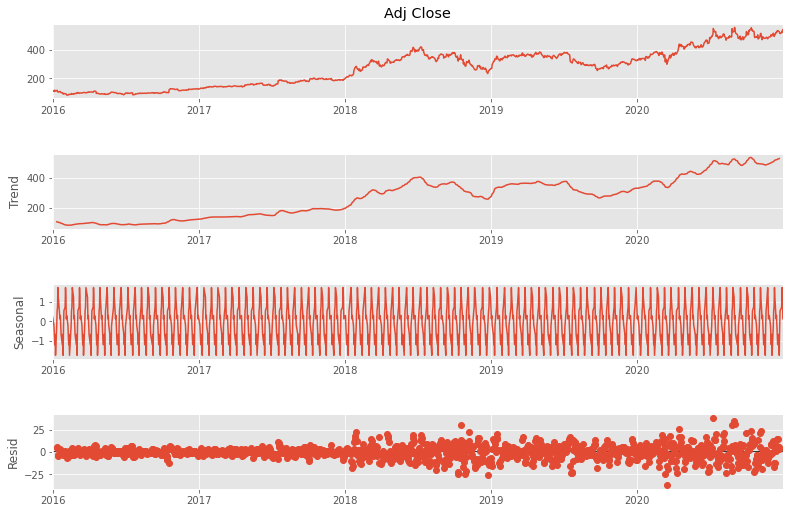

In [8]:
# Display the decomposition of the time series into trend and seasonality components
time_series = sm.tsa.seasonal_decompose(df['Adj Close'], period=12)
fig = time_series.plot()
fig.set_figheight(8)
fig.set_figwidth(12)
plt.show()

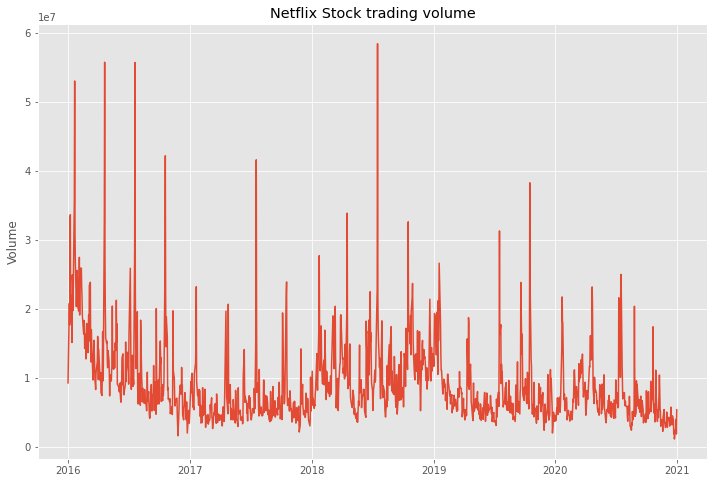

In [9]:
#Plotting the volume
plt.figure(figsize=(12,8))
plt.ylabel('Volume')
plt.title('Netflix Stock trading volume')

plt.plot(df['Volume'])
plt.show()

# Feature Engineering

***Using ta-lib to caculate various analysing features, list as below:
Bollinger Bands ; MA30 ; MA60; EMA13; EMA34; WMA30--Weighted moving average; ATR--Average True Range
OBV- On Balance Volume; CCI--Commodity Channel Index; MACD--Moving Average Convergence/Divergence
RSI --Relative Strength Index ; BETA ; CORREL --Pearson's Correlation Coefficient; VAR-- Variance***

In [10]:
#Extract the values of each features
Open = df['Open'].values
High = df['High'].values
Low = df['Low'].values
Close = df['Close'].values
Volume = df['Volume'].values

In [11]:
#Get the log return of the volume by one day
log_re = np.log(df['Adj Close'] / df['Adj Close'].shift(1))
log_re

Date
2015-12-31         NaN
2016-01-04   -0.039410
2016-01-05   -0.021139
2016-01-06    0.088991
2016-01-07   -0.026870
                ...   
2020-12-24   -0.000992
2020-12-28    0.009970
2020-12-29    0.022382
2020-12-30   -0.011900
2020-12-31    0.030303
Name: Adj Close, Length: 1260, dtype: float64

<AxesSubplot:xlabel='Date'>

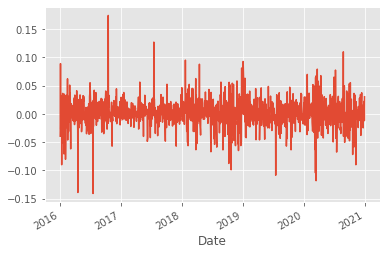

In [12]:
#visualizing the Log return
log_re.plot()

In [13]:
#Get the percentage daily, weekly and monthly return
df['Daily Return (%)'] = 100*np.log(df['Adj Close']/df['Adj Close'].shift(1))
df['Weekly Return (%)'] = 100*np.log(df['Adj Close'] / df['Adj Close'].shift(5))
df['Monthly Return (%)'] = 100*np.log(df['Adj Close'] / df['Adj Close'].shift(20))

In [14]:
df['Boll_Up'], df['Boll_Med'], df['Boll_Dw'] = ta.BBANDS(Close, timeperiod=26, nbdevup=2, nbdevdn=2,matype=0)

In [15]:
df['MA_30'] =  ta.MA(Close, timeperiod=30, matype=0)
df['MA_60'] = ta.MA(Close, timeperiod=60, matype=0)
df['EMA_13'] = ta.EMA(np.array(Close), timeperiod=13)
df['EMA_34'] = ta.EMA(np.array(Close), timeperiod=34)
df['WMA_30'] = ta.WMA(Close, timeperiod=30)
df['ATR'] = ta.ATR(High, Low, Close, timeperiod=14)
df['OBV'] = ta.OBV(df.Close, df.Volume)
df['CCI'] = ta.CCI(High, Low, Close, timeperiod=14)
df['MACD'], df['MACD_Signal'], df['MACD_Hist'] = ta.MACD(Close, 12, 26, 9)
df['RSI'] = ta.RSI(Close, timeperiod=14)
df['Beta'] = ta.BETA(High, Low, timeperiod=5)
df['Correl'] = ta.CORREL(High, Low, 30)
df['Var'] = ta.VAR(Close, timeperiod=5, nbdev=1)


In [16]:
#Check for any missing values and drop them
df.isna().sum()

High                   0
Low                    0
Open                   0
Close                  0
Volume                 0
Adj Close              0
Daily Return (%)       1
Weekly Return (%)      5
Monthly Return (%)    20
Boll_Up               25
Boll_Med              25
Boll_Dw               25
MA_30                 29
MA_60                 59
EMA_13                12
EMA_34                33
WMA_30                29
ATR                   14
OBV                    0
CCI                   13
MACD                  33
MACD_Signal           33
MACD_Hist             33
RSI                   14
Beta                   5
Correl                29
Var                    4
dtype: int64

In [17]:
#Drop the missing values
df.dropna(inplace=True)
df.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close',
       'Daily Return (%)', 'Weekly Return (%)', 'Monthly Return (%)',
       'Boll_Up', 'Boll_Med', 'Boll_Dw', 'MA_30', 'MA_60', 'EMA_13', 'EMA_34',
       'WMA_30', 'ATR', 'OBV', 'CCI', 'MACD', 'MACD_Signal', 'MACD_Hist',
       'RSI', 'Beta', 'Correl', 'Var'],
      dtype='object')

In [18]:
#col_feat = list(df)
#col_feat.insert(27, col_feat.pop(col_feat.index('Adj Close')))

In [19]:
df = df.reindex(columns=['Open', 'High', 'Low', 'Close', 'Volume',\
                         'Daily Return (%)', 'Weekly Return (%)', 'Monthly Return (%)',\
                         'Boll_Up', 'Boll_Med', 'Boll_Dw', 'MA_30', 'MA_60', 'EMA_13', 'EMA_34',\
                         'WMA_30', 'ATR', 'OBV', 'CCI', 'MACD', 'MACD_Signal', 'MACD_Hist',\
                         'RSI', 'Beta', 'Correl', 'Var', 'Adj Close'])
df.head()

Open        High         Low       Close    Volume  \
Date                                                                   
2016-03-29  101.080002  104.330002  101.000000  104.129997  16008900   
2016-03-30  104.650002  104.910004  101.480003  102.190002  14705000   
2016-03-31  102.430000  103.529999  101.050003  102.230003   9747500   
2016-04-01  102.930000  105.790001  102.470001  105.699997  14182400   
2016-04-04  105.900002  105.919998  103.199997  104.349998  10940400   

            Daily Return (%)  Weekly Return (%)  Monthly Return (%)  \
Date                                                                  
2016-03-29          2.844254           2.992572           10.864165   
2016-03-30         -1.880624           2.326498            3.880979   
2016-03-31          0.039136           2.616349            4.624526   
2016-04-01          3.337965           7.197064            7.635192   
2016-04-04         -1.285425           3.055306            2.690394   

               Boll_Up   Boll_Med  ...         OBV         CCI      MACD  \
Date                               ...                                     
2016-03-29  104.274400  97.535385  ... -58426300.0  179.215327  1.367828   
2016-03-30  104.509566  97.930000  ... -73131300.0  140.828770  1.444968   
2016-03-31  104.194212  98.434231  ... -63383800.0  100.471672  1.492130   
2016-04-01  104.717214  98.976154  ... -49201400.0  163.850150  1.788884   
2016-04-04  105.166822  99.353846  ... -60141800.0  129.231589  1.893306   

            MACD_Signal  MACD_Hist        RSI      Beta    Correl       Var  \
Date                                                                          
2016-03-29     0.843361   0.524466  62.628680  0.776792  0.960068  3.888982   
2016-03-30     0.963683   0.481286  57.668027  0.789427  0.961823  4.033743   
2016-03-31     1.069372   0.422758  57.742351  0.768503  0.963204  3.558542   
2016-04-01     1.213275   0.575610  63.696838  0.620321  0.964794  2.595530   
2016-04-04     1.349281   0.544025  60.145967  0.765292  0.964108  1.809273   

             Adj Close  
Date                    
2016-03-29  104.129997  
2016-03-30  102.190002  
2016-03-31  102.230003  
2016-04-01  105.699997  
2016-04-04  104.349998  

[5 rows x 27 columns]

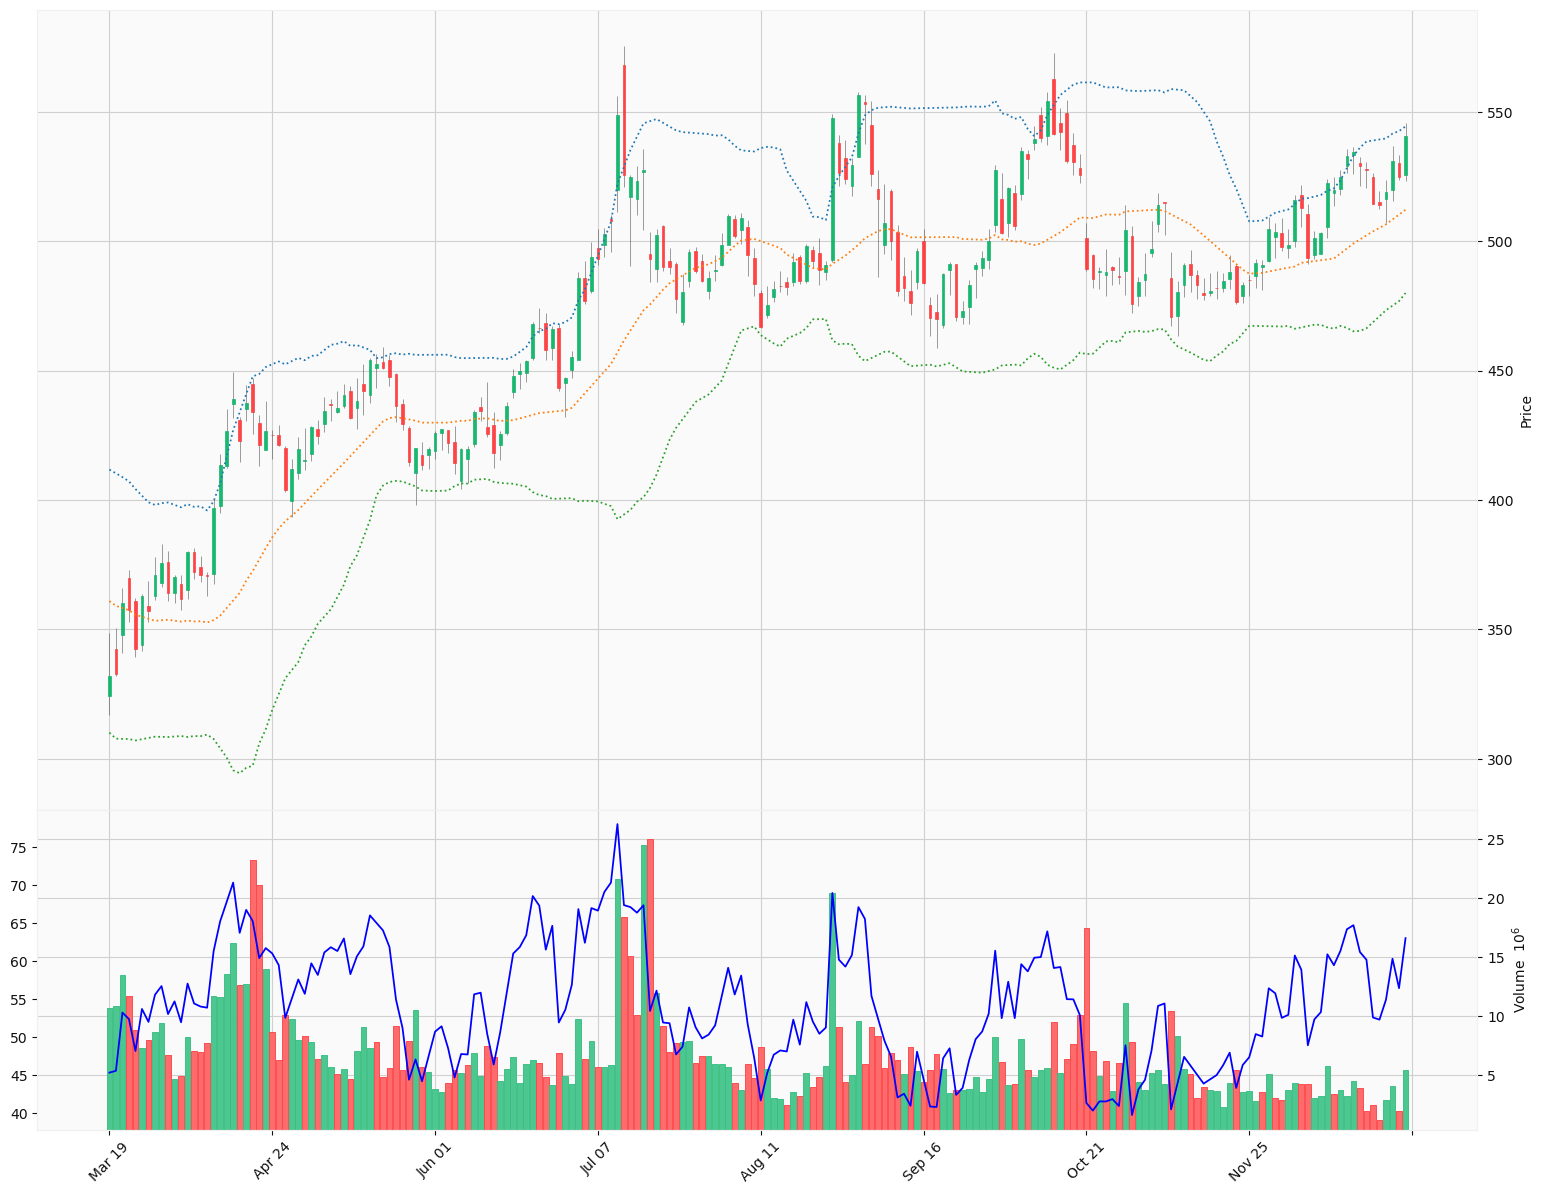

In [20]:
#Visualizing the bollinga bands TA
make_plot = [mpf.make_addplot(df[-200:][['Boll_Up', 'Boll_Med', 'Boll_Dw']], linestyle='dotted'),
            mpf.make_addplot(df[-200:]['RSI'], panel=1, color='b')]
mpf.plot(df[-200:], volume=True, addplot=make_plot, figsize=(20,16), style='yahoo', type = 'candle')

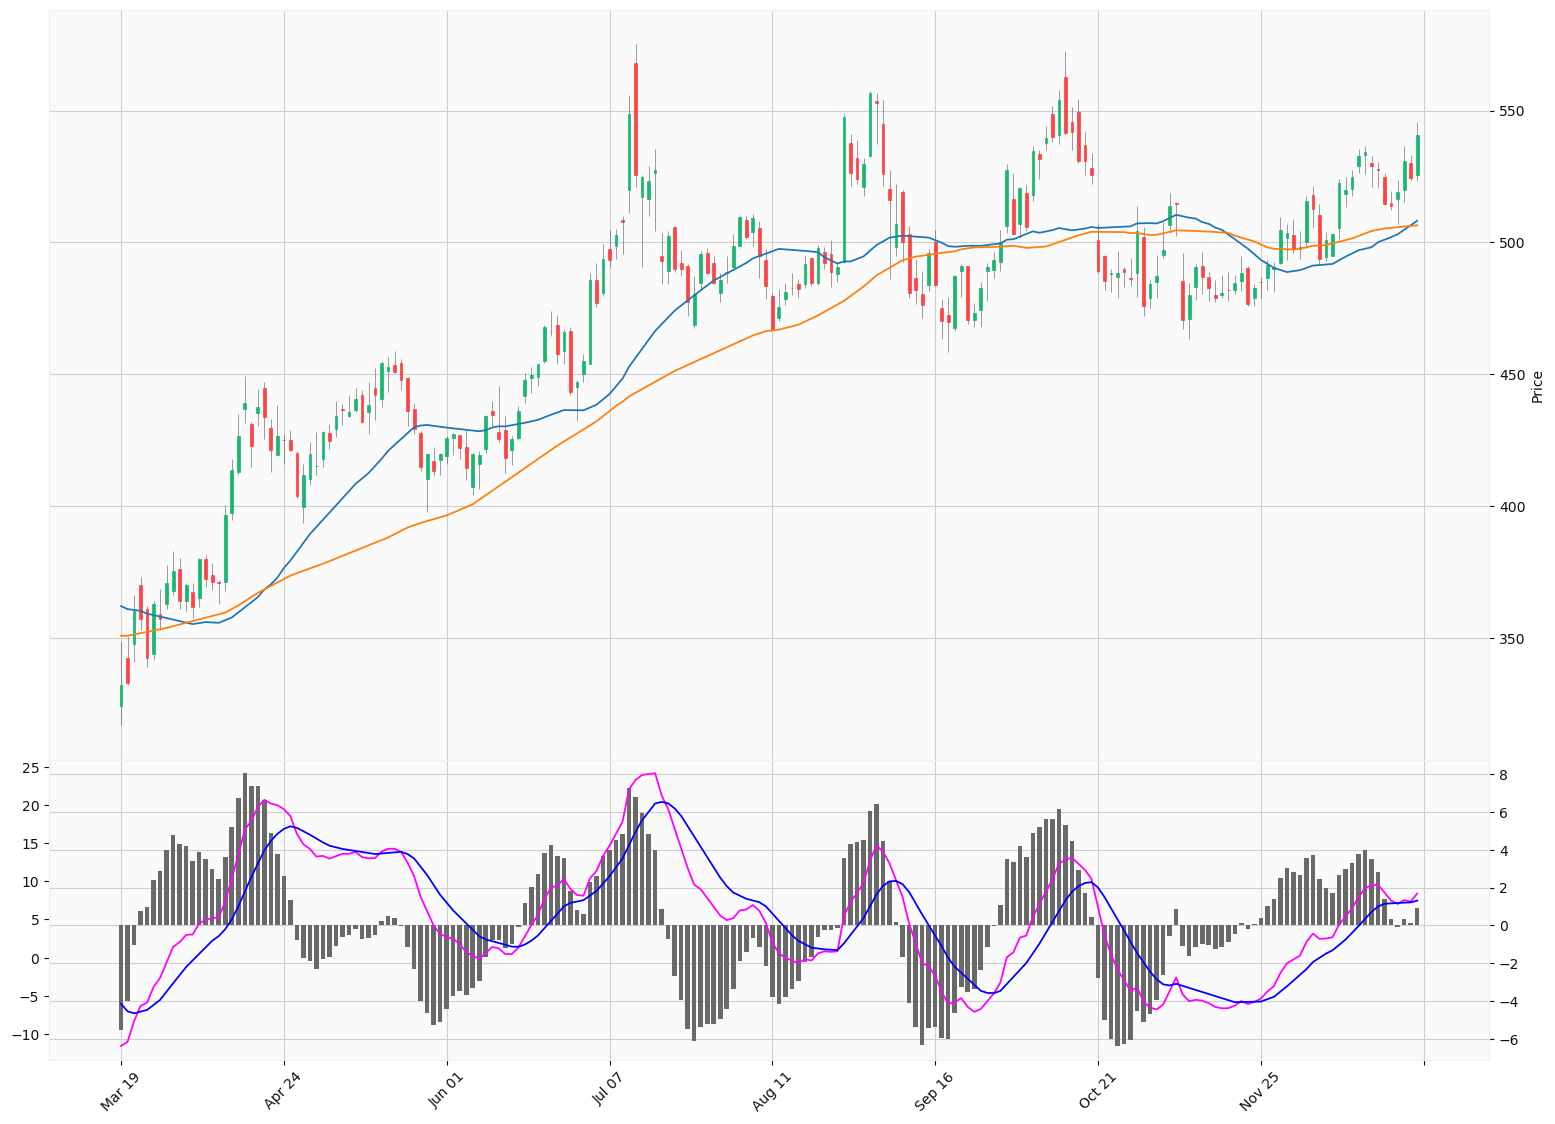

In [21]:
#Visualizing the TA like moving averages
make_plot1 = [mpf.make_addplot(df[-200:][['MA_30', 'MA_60']]),
            mpf.make_addplot(df[-200:]['MACD_Hist'], type='bar', width=0.7, panel=1, color='dimgray', alpha=1, 
                            secondary_y=False),
            mpf.make_addplot(df[-200:]['MACD'], panel=1, color='fuchsia', secondary_y=True),
            mpf.make_addplot(df[-200:]['MACD_Signal'], panel=1, color='b', secondary_y=True)]
mpf.plot(df[-200:], volume=False, addplot=make_plot1, figsize=(20,15), style='yahoo', type='candle')

In [22]:
#Plotting daily return
from plotly.subplots import make_subplots
fig = make_subplots(rows=3, cols=1, shared_xaxes=True)
fig.add_trace(go.Histogram(x=df['Daily Return (%)'], name='Daily Return (%)'), row=1, col=1)
fig.add_trace(go.Histogram(x=df['Weekly Return (%)'], name='Weekly Return (%)'), row=2, col=1)
fig.add_trace(go.Histogram(x=df['Monthly Return (%)'], name='Monthly Return (%)'), row=3,col=1)
fig.show()